# <span style="color:blue"> Mood classifier </span>

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
loc = './data/'
print(f"load train data:")
train_hdf = h5py.File(loc+'mood_train.h5', 'r')
print(f"list of keys in train dataset: {list(train_hdf.keys())}")
X_train = np.array(train_hdf.get('train_set_x'))
y_train = np.array(train_hdf.get('train_set_y'))
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")

print(f"load test data:")
test_hdf = h5py.File(loc+'mood_test.h5', 'r')
print(f"list of keys in test dataset: {list(test_hdf.keys())}")
X_test = np.array(test_hdf.get('test_set_x'))
y_test = np.array(test_hdf.get('test_set_y'))
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

load train data:
list of keys in train dataset: ['list_classes', 'train_set_x', 'train_set_y']
X_train.shape = (600, 64, 64, 3)
y_train.shape = (600,)
load test data:
list of keys in test dataset: ['list_classes', 'test_set_x', 'test_set_y']
X_test.shape = (150, 64, 64, 3)
y_test.shape = (150,)


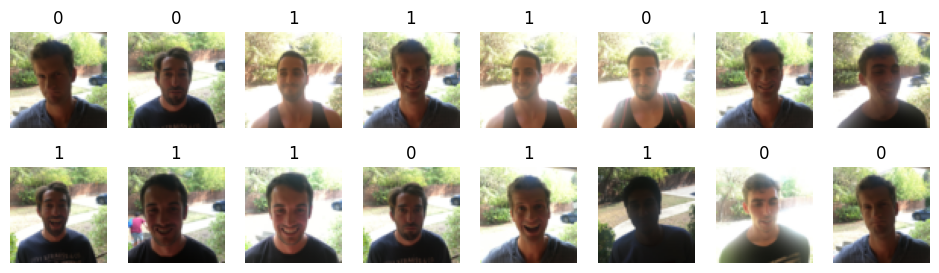

In [4]:
m = X_train.shape[0]
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(12, 3))
fig.subplots_adjust(wspace=0.1, hspace=0.4)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random training data
    a.imshow(X_train[random_index])
    a.set_title(y_train[random_index])
    a.set_axis_off()

plt.show()

# CNN by tf.keras.Sequential 

In [6]:
tfl = tf.keras.layers
model = tf.keras.Sequential([
    tf.keras.Input(shape=X_train.shape[1:],name="data-shape"), # input shape
    tfl.BatchNormalization(axis=-1,name="batch-normalization"), # normalize the data of each channel
    tfl.Conv2D(filters=6, kernel_size=5, strides=1, padding='same', activation='relu',name='conv-layer-1'),# conv layer 1
    tfl.MaxPool2D(pool_size=(2, 2),strides=2,padding='same',name="pool-layer-1"),# max pool 1
    tfl.Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu',name='conv-layer-2'),# conv layer 2
    tfl.MaxPool2D(pool_size=(2, 2),strides=2,padding='same',name="pool-layer-2"),# max pool 2
    tfl.Flatten(name='flatten'), # flatten the 3D activation
    tfl.Dense(units=120,name='FC-layer-3'),
    tfl.Dense(units=84,name='FC-layer-4'),
    tfl.Dense(units=1, activation='sigmoid',name='output-layer')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch-normalization (BatchN  (None, 64, 64, 3)        12        
 ormalization)                                                   
                                                                 
 conv-layer-1 (Conv2D)       (None, 64, 64, 6)         456       
                                                                 
 pool-layer-1 (MaxPooling2D)  (None, 32, 32, 6)        0         
                                                                 
 conv-layer-2 (Conv2D)       (None, 32, 32, 16)        2416      
                                                                 
 pool-layer-2 (MaxPooling2D)  (None, 16, 16, 16)       0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                      

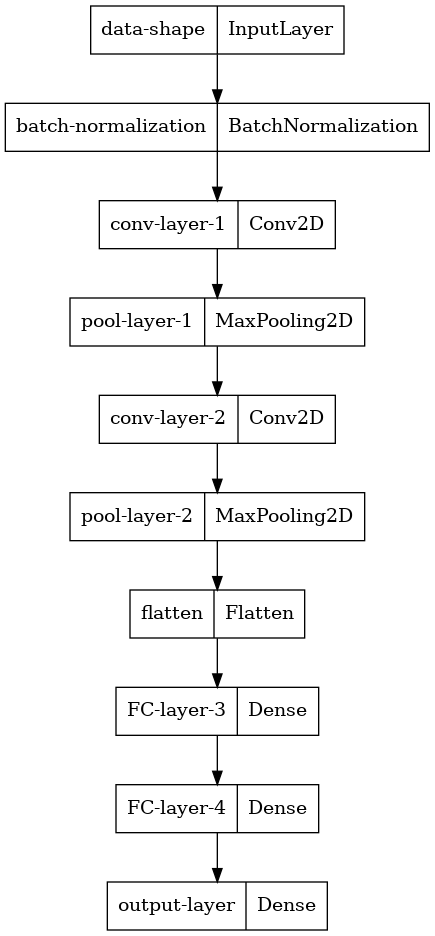

In [7]:
tf.keras.utils.plot_model(model, "CNN-mood-classifier.png")

In [126]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
)

In [127]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 0.9288 - accuracy: 0.5150
Epoch 2/10
19/19 [==============================] - 1s 27ms/step - loss: 0.6346 - accuracy: 0.6117
Epoch 3/10
19/19 [==============================] - 1s 27ms/step - loss: 0.4167 - accuracy: 0.8333
Epoch 4/10
19/19 [==============================] - 1s 27ms/step - loss: 0.1906 - accuracy: 0.9267
Epoch 5/10
19/19 [==============================] - 1s 27ms/step - loss: 0.1041 - accuracy: 0.9683
Epoch 6/10
19/19 [==============================] - 1s 27ms/step - loss: 0.0891 - accuracy: 0.9717
Epoch 7/10
19/19 [==============================] - 1s 29ms/step - loss: 0.0654 - accuracy: 0.9833
Epoch 8/10
19/19 [==============================] - 1s 27ms/step - loss: 0.0495 - accuracy: 0.9883
Epoch 9/10
19/19 [==============================] - 1s 29ms/step - loss: 0.0342 - accuracy: 0.9883
Epoch 10/10
19/19 [==============================] - 1s 29ms/step - loss: 0.0330 - accuracy: 0.9883


# Model evaluation by test data

In [137]:
eval = model.evaluate(X_test, y_test,verbose=0)
print(f"accuracy = {eval[1]*100:.2f}%")

accuracy = 96.00%


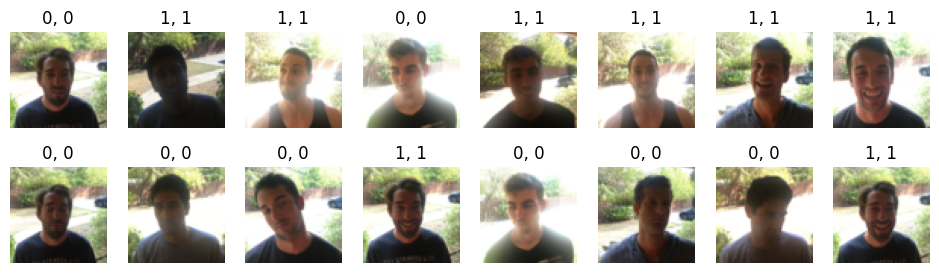

In [152]:
m = X_test.shape[0]
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(12, 3))
fig.subplots_adjust(wspace=0.1, hspace=0.4)
for a in ax.flat:
    random_index = np.random.randint(m)# pick a random test data
    a.imshow(X_test[random_index])
    probability = model.predict(np.expand_dims(X_test[random_index], axis=0),verbose=0)
    yhat = (probability > 0.5).astype(int).item()
    a.set_title(f"{y_test[random_index]}, {yhat}")
    a.set_axis_off()

plt.show()